In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statistics
%config Completer.use_jedi = False
from sklearn.preprocessing import QuantileTransformer


In [2]:
X = pd.read_csv("/Users/macbookpro/Documents/GitHub/IronBiagio/Customer_Analysis_Case_Study/Data/df_X_modified.csv")
Y = pd.read_csv("/Users/macbookpro/Documents/GitHub/IronBiagio/Customer_Analysis_Case_Study/Data/df_Y_modified.csv")

-Linear Regression:
Train-test split.
Standardize the data (after the data split).
Apply linear regression.
Model Interpretation.
Model Validation

-Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.

In [3]:
X

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,...,Vehicle Class,Vehicle Size,Vehicle Type,Number of Open Complaints,Number of Policies,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
0,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,...,SUV,Medsize,A,0.0,2,14947.92,22139.0,100,34.0,31
1,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,...,Four-Door Car,Medsize,A,0.0,2,22332.44,49078.0,97,10.0,3
2,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,...,SUV,Large,A,0.0,1,5154.76,82730.0,127,13.0,31
3,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,...,Two-Door Car,Medsize,A,0.0,4,5454.59,66334.0,69,25.0,25
4,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,...,Two-Door Car,Large,A,0.0,6,5326.68,76717.0,66,26.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,Arizona,Yes,Basic,Master,1/26/11,Employed,M,Rural,Single,Personal Auto,...,Sports Car,Medsize,A,0.0,8,9075.77,37722.0,116,8.0,23
3296,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,...,Four-Door Car,Medsize,A,2.0,1,3579.02,28304.0,91,10.0,30
3297,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,A,4.0,1,2771.66,59855.0,74,30.0,82
3298,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,...,Four-Door Car,Medsize,A,0.0,6,5259.44,61146.0,65,7.0,68


In [4]:
Y = Y["Total Claim Amount"]
Y

0       480.00
1       484.01
2       442.52
3       331.20
4       300.53
         ...  
3295    158.08
3296    655.20
3297    355.20
3298    273.02
3299    618.29
Name: Total Claim Amount, Length: 3300, dtype: float64

In [5]:
Xn = X.select_dtypes(np.number)
Xc = X.select_dtypes("object")

In [6]:
Xn.drop(columns=['Number of Open Complaints','Number of Policies'], inplace=True)

#switch this two columns into the categoricals df
Xc['Number of Open Complaints'] = X['Number of Open Complaints']
Xc['Number of Policies'] = X['Number of Policies']

/Users/macbookpro/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/2c/wl35d59s78q2s8_vnnh5zj3c0000gn/T/ipykernel_16249/1136022982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xc['Number of Open Complaints'] = X['Number of Open Complaints']
/var/folders/2c/wl35d59s78q2s8_vnnh5zj3c0000gn/T/ipykernel_16249/1136022982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [7]:
Xn

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
0,14947.92,22139.0,100,34.0,31
1,22332.44,49078.0,97,10.0,3
2,5154.76,82730.0,127,13.0,31
3,5454.59,66334.0,69,25.0,25
4,5326.68,76717.0,66,26.0,10
...,...,...,...,...,...
3295,9075.77,37722.0,116,8.0,23
3296,3579.02,28304.0,91,10.0,30
3297,2771.66,59855.0,74,30.0,82
3298,5259.44,61146.0,65,7.0,68


In [8]:
Cat_col=pd.get_dummies(Xc, drop_first=True)
Cat_col

,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,2,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0.0,2,0,0,1,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
2,0.0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.0,4,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,0.0,6,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,0.0,8,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3296,2.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3297,4.0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3298,0.0,6,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [9]:
X = pd.concat([Cat_col,Xn], axis=1)
X

,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
0,0.0,2,0,0,0,1,0,0,0,0,...,1,0,0,1,0,14947.92,22139.0,100,34.0,31
1,0.0,2,0,0,1,0,1,1,0,1,...,0,0,0,1,0,22332.44,49078.0,97,10.0,3
2,0.0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,5154.76,82730.0,127,13.0,31
3,0.0,4,1,0,0,0,0,0,0,0,...,0,0,1,1,0,5454.59,66334.0,69,25.0,25
4,0.0,6,1,0,0,0,0,0,0,0,...,0,0,1,0,0,5326.68,76717.0,66,26.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,0.0,8,0,0,0,0,1,0,0,0,...,0,1,0,1,0,9075.77,37722.0,116,8.0,23
3296,2.0,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,3579.02,28304.0,91,10.0,30
3297,4.0,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,2771.66,59855.0,74,30.0,82
3298,0.0,6,0,0,1,0,0,0,0,1,...,0,0,0,1,0,5259.44,61146.0,65,7.0,68


In [10]:
#checking for high correlated coluns
correlated_features = set()
correlation_matrix = X.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [11]:
len(correlated_features)



0

In [12]:
X.drop(columns = ["Marital Status_Single", "Coverage_Extended", "Vehicle Class_Two-Door Car", "Effective To Date_1/14/11", "Effective To Date_2/8/11"], inplace = True)

In [13]:
X

,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Premium,Education_College,Education_Doctor,...,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception
0,0.0,2,0,0,0,1,0,0,0,0,...,0,1,0,1,0,14947.92,22139.0,100,34.0,31
1,0.0,2,0,0,1,0,1,0,1,0,...,0,0,0,1,0,22332.44,49078.0,97,10.0,3
2,0.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,5154.76,82730.0,127,13.0,31
3,0.0,4,1,0,0,0,0,0,0,0,...,0,0,0,1,0,5454.59,66334.0,69,25.0,25
4,0.0,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,5326.68,76717.0,66,26.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,0.0,8,0,0,0,0,1,0,0,0,...,0,0,1,1,0,9075.77,37722.0,116,8.0,23
3296,2.0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,3579.02,28304.0,91,10.0,30
3297,4.0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,2771.66,59855.0,74,30.0,82
3298,0.0,6,0,0,1,0,0,0,1,0,...,0,0,0,1,0,5259.44,61146.0,65,7.0,68


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=123)


In [15]:
#sns.displot(Xn["Months Since Last Claim"])

In [16]:
std_scaler=StandardScaler().fit(X_train) 
X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)


In [17]:
#qt = QuantileTransformer(output_distribution="normal").fit(Xn_train_scaled)
#Xn_train_norm = qt.transform(Xn_train_scaled)
#sns.displot(Xn_train_norm)

In [18]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [19]:
#model.coef_


In [20]:
model.intercept_


374.9640113240592

In [21]:
model.score(X_test_scaled,Y_test)


0.8103172889463115

In [22]:
Y_pred=model.predict(X_test_scaled)   # model prediction


In [23]:
result=pd.DataFrame({"Y_test":Y_test, "Y_pred":Y_pred})
result

,Y_test,Y_pred
1482,701.71,504.192849
2738,296.21,350.671972
2743,56.37,4.697349
2424,1961.16,978.778697
805,633.60,513.841535
...,...,...
1866,621.46,548.022383
265,403.20,481.411947
2430,331.20,418.901070
1324,8.32,31.220348


In [24]:
#Y_pred

In [25]:
MSE = np.mean( np.power( Y_test - Y_pred , 2 ) )
print(MSE)

13021.684299230965


In [26]:
from sklearn.metrics import mean_squared_error, r2_score
print("The mean_squared_error is {:.2f}".format(mean_squared_error(Y_test,Y_pred)))
print("The R2 is {:.2f}".format(r2_score(Y_test,Y_pred)))

The mean_squared_error is 13021.68
The R2 is 0.81


In [27]:
RMSE = np.sqrt(MSE)
RMSE

114.11259483173173

In [28]:
MAE = np.mean( np.abs( Y_test - Y_pred ) )
MAE

79.54962515688965

In [29]:
R2_test=model.score(X_test_scaled,Y_test)
print(R2_test)


Adj_R2= 1 - (1-R2_test)*(len(Y_test)-1)/(len(Y_test)-X_test_scaled.shape[1]-1)
print(Adj_R2)


0.8103172889463115
0.7755818553242716


In [30]:
R2=model.score(X_train_scaled,Y_train)
print(R2)

Adj_R2= 1 - (1-R2)*(len(Y_train)-1)/(len(Y_train)-X_train_scaled.shape[1]-1)
print(Adj_R2)

0.7961138565227354
0.7879166209552615


In [31]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=True)
features_importances

,Attribute,Importance
44,Effective To Date_2/12/11,3.325073e-03
13,Effective To Date_1/11/11,5.918189e-02
19,Effective To Date_1/18/11,7.915203e-02
100,Months Since Last Claim,1.344605e-01
58,Effective To Date_2/25/11,1.356668e-01
...,...,...
79,Policy_Personal L1,2.055061e+14
80,Policy_Personal L2,2.566153e+14
75,Policy Type_Personal Auto,2.663221e+14
76,Policy Type_Special Auto,2.877561e+14


## Improving model

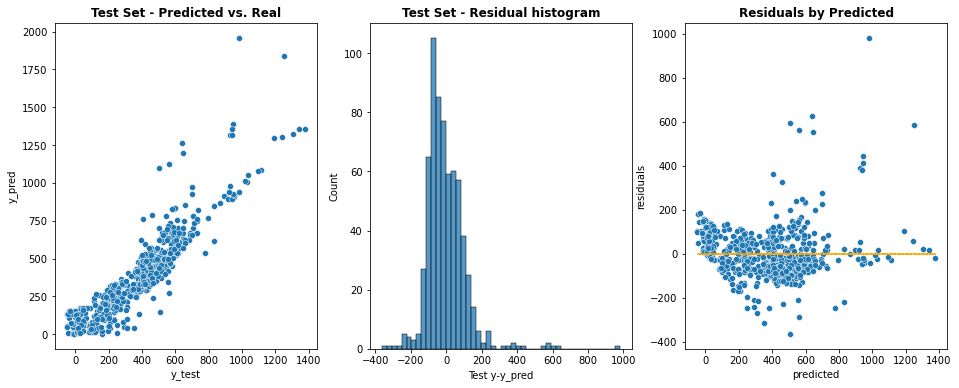

In [32]:
fig1, ax1 = plt.subplots(1,3, figsize=(16,6))

sns.scatterplot(x=Y_pred, y=Y_test, ax=ax1[0])
ax1[0].set_xlabel("y_test")
ax1[0].set_ylabel("y_pred")
ax1[0].set_title('Test Set - Predicted vs. Real', fontweight='bold')

sns.histplot(Y_test-Y_pred, ax = ax1[1])
ax1[1].set_xlabel("Test y-y_pred")
ax1[1].set_title('Test Set - Residual histogram', fontweight='bold')

sns.scatterplot(x = Y_pred,y = Y_test - Y_pred, ax=ax1[2])
ax1[2].set_xlabel("predicted")
ax1[2].set_ylabel("residuals")
ax1[2].set_title('Residuals by Predicted', fontweight='bold')
ax1[2].plot(Y_pred,np.zeros(len(Y_pred)),linestyle='dashed', color='orange')

## Power transformer and Quantile Transformer

In [ ]:
#qt = QuantileTransformer(output_distribution="normal")
#Customer_Lifetime_Value_transformed = qt.fit_transform(X_num["Customer Lifetime Value"].to_numpy().reshape(-1,1))
#sns.displot(Customer_Lifetime_Value_transformed)
#replace

## pt = PowerTransformer(method = "box-cox", , standardize=False)
 ##Customer_Lifetime_Value_transformed=pt.fit_transform(X_num["Customer Lifetime Value"].to_numpy().reshape(-1,1))
 ##sns.displot(Customer_Lifetime_Value_transformed)
#replace
#X_num["Customer_Lifetime_Value_transformed"]= Customer_Lifetime_Value_transformed
#X_num.drop(["Customer Lifetime Value"],axis=1,inplace=True)

#qt = QuantileTransformer(output_distribution="normal")
#Income_Transformed = qt.fit_transform(X_num["Income"].to_numpy().reshape(-1,1))
#sns.displot(Income_Transformed)
#replace
#X_num["Income_Transformed"]= Income_Transformed
#X_num.drop(["Income"],axis=1,inplace=True)

#qt = QuantileTransformer(output_distribution="normal")
#Monthly_Premium_Auto_transformed = qt.fit_transform(X_num["Monthly Premium Auto"].to_numpy().reshape(-1,1))
#sns.displot(Monthly_Premium_Auto_transformed)
#replace
#X_num["Monthly_Premium_Auto_transformed"]= Monthly_Premium_Auto_transformed
#X_num.drop(["Monthly Premium Auto"],axis=1,inplace=True)

#qt = QuantileTransformer(output_distribution="normal")
#Months_Since_Last_Claim_transformed = qt.fit_transform(X["Months Since Last Claim"].to_numpy().reshape(-1,1))
#sns.displot(Months_Since_Last_Claim_transformed)
#replace
#X_num["Months_Since_Last_Claim_transformed"]= Months_Since_Last_Claim_transformed
#X_num.drop(["Months Since Last Claim"],axis=1,inplace=True)

#qt = QuantileTransformer(output_distribution="normal")
#Months_Since_Policy_Inception_transformed = qt.fit_transform(X_num["Months Since Policy Inception"].to_numpy().reshape(-1,1))
#sns.displot(Months_Since_Policy_Inception_transformed)
#replace
#X_num["Months_Since_Policy_Inception_transformed"]= Months_Since_Policy_Inception_transformed
#X_num.drop(["Months Since Policy Inception"],axis=1,inplace=True)

In [ ]:
#checking for high correlated coluns
correlated_features = set()
correlation_matrix = X.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            len(correlated_features)



In [ ]:
mean_clv = np.mean(customer_df['Customer Lifetime Value'])
std_clv = np.std(customer_df['Customer Lifetime Value'])

threshold = 3
outliers_clv = []
for i in customer_df['Customer Lifetime Value']:
    z = (i-mean_clv)/std_clv
    if z > threshold:
        outliers_clv.append(i)
print(outliers_clv)

In [ ]:
Q1 = df_c["Customer Lifetime Value"].quantile(0.25)
Q3 = df_c["Customer Lifetime Value"].quantile(0.75)
iqr = Q3 - Q1
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
df_c = df_c[((df_c["Customer Lifetime Value"] > (Q1 - 1.5 * iqr)) & df_c["Customer Lifetime Value"] < (Q3 + 1.5 * iqr))]